### webscraping of mobile specification from flipkart

In [1]:
import bs4
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
link="https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=TRENDING&suggestionId=mobiles&requestId=cdd49d46-cb58-4f9e-a22f-e986cbb2b361"

In [3]:
page = requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
len(page.text)

559101

In [6]:
page.status_code

200

In [7]:
soup = bs(page.content,'html.parser')

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7f97aa.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

In [9]:
count=0                  
products=[]              
prices=[]                
ratings=[]              
drive = []                 
processor = []                  
battery= []                  
display = []
camera=[]
warranty=[]

In [10]:
for containers in soup.findAll('a',class_='_1fQZEK'):
        name=containers.find('div', attrs={'class':'_4rR01T'})
        price=containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div', attrs={'class':'_3LWZlK'})
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        ## Splitting integrated specification into individual Memory, display, camera, battery,processor and Warranty specifications
        for col in specification:
            col=col.find_all('li', attrs={'class':'rgWa7D'})
            memory =col[0].text
            dis= col[1].text
            cam = col[2].text
            batt = col[3].text
            pross = col[4].text
            warnt = col[5].text
        
        products.append(name.text) # Add product name to list
        
        prices.append(price.text) # Add price to list
        
        drive.append(memory) # Add drive specifications to list
        
        display.append(dis) # Add Display specifications to list
        
        camera.append(cam) # Add camera specifications to to list
        
        battery.append(batt) # Add battery specifications to to list
        
        processor.append(pross)  # Add processor specifications to to list
        
        warranty.append(warnt)  # Add warranty specifications to to list
        
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count=count+1 # Increment row count

In [11]:
# length of all list
print(len(products))
print(len(ratings))
print(len(prices))
print(len(drive))
print(len(display))
print(len(camera))
print(len(battery))
print(len(processor))
print(len(warranty))

24
24
24
24
24
24
24
24
24


In [14]:
mobile={'Product Name':products,'All_Drive':drive,'Display':display,'Camera':camera,"Battery":battery,'Processor':processor,'Warranty':warranty,'Price':prices,'Rating':ratings,}

In [15]:
df=pd.DataFrame(mobile)

In [16]:
df

,Product Name,All_Drive,Display,Camera,Battery,Processor,Warranty,Price,Rating
0,"POCO M3 (Power Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,"One Year Warranty for Handset, 6 Months for Ac...","₹11,499",4.3
1,"POCO C3 (Matte Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories,"₹7,499",4.3
2,"REDMI 9 Prime (Space Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,"₹9,999",4.4
3,"realme C20 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹6,999",4.4
4,"realme C20 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹6,999",4.4
5,"REDMI 9 Prime (Mint Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,"₹9,999",4.4
6,"OPPO A33 (Mint Cream, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,"₹8,990",4.3
7,"OPPO A33 (Moonlight Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,"₹8,990",4.3
8,"REDMI 9i (Nature Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹8,499",4.3
9,"REDMI 9 Power (Blazing Blue, 64 GB)",4 GB RAM | 64 GB ROM,16.59 cm (6.53 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 662 Processor,1 year manufacturer warranty for device and 6 ...,"₹10,999",4.3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  24 non-null     object
 1   All_Drive     24 non-null     object
 2   Display       24 non-null     object
 3   Camera        24 non-null     object
 4   Battery       24 non-null     object
 5   Processor     24 non-null     object
 6   Warranty      24 non-null     object
 7   Price         24 non-null     object
 8   Rating        24 non-null     object
dtypes: object(9)
memory usage: 1.8+ KB


In [19]:
print(df.shape)

(24, 9)


In [20]:
df.isnull()

,Product Name,All_Drive,Display,Camera,Battery,Processor,Warranty,Price,Rating
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()# Check for null values

Product Name    0
All_Drive       0
Display         0
Camera          0
Battery         0
Processor       0
Warranty        0
Price           0
Rating          0
dtype: int64

In [22]:
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',' : ''}, regex=True)
df.head() # Check if formatting is correct

,Product Name,All_Drive,Display,Camera,Battery,Processor,Warranty,Price,Rating
0,"POCO M3 (Power Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,"One Year Warranty for Handset, 6 Months for Ac...",11499,4.3
1,"POCO C3 (Matte Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories,7499,4.3
2,"REDMI 9 Prime (Space Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,9999,4.4
3,"realme C20 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999,4.4
4,"realme C20 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999,4.4


In [23]:
df.dtypes


Product Name    object
All_Drive       object
Display         object
Camera          object
Battery         object
Processor       object
Warranty        object
Price           object
Rating          object
dtype: object

In [24]:
# Convert numeric columns in string format to float for mathematical and graphic operations

df.iloc[:,7]= df.iloc[:,7].astype(float)
df.iloc[:,8]= df.iloc[:,8].astype(float)

In [25]:
df

,Product Name,All_Drive,Display,Camera,Battery,Processor,Warranty,Price,Rating
0,"POCO M3 (Power Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,"One Year Warranty for Handset, 6 Months for Ac...",11499.0,4.3
1,"POCO C3 (Matte Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories,7499.0,4.3
2,"REDMI 9 Prime (Space Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,9999.0,4.4
3,"realme C20 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999.0,4.4
4,"realme C20 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999.0,4.4
5,"REDMI 9 Prime (Mint Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,9999.0,4.4
6,"OPPO A33 (Mint Cream, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,8990.0,4.3
7,"OPPO A33 (Moonlight Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,8990.0,4.3
8,"REDMI 9i (Nature Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,8499.0,4.3
9,"REDMI 9 Power (Blazing Blue, 64 GB)",4 GB RAM | 64 GB ROM,16.59 cm (6.53 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 662 Processor,1 year manufacturer warranty for device and 6 ...,10999.0,4.3


In [26]:
df.to_csv('mobile.csv',index=None)

In [27]:
mobile_df=pd.read_csv('mobile.csv')

In [28]:
mobile_df

,Product Name,All_Drive,Display,Camera,Battery,Processor,Warranty,Price,Rating
0,"POCO M3 (Power Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,"One Year Warranty for Handset, 6 Months for Ac...",11499.0,4.3
1,"POCO C3 (Matte Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Li-ion Polymer Battery,Mediatek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories,7499.0,4.3
2,"REDMI 9 Prime (Space Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,9999.0,4.4
3,"realme C20 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999.0,4.4
4,"realme C20 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,6999.0,4.4
5,"REDMI 9 Prime (Mint Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,5020 mAh Battery,MediaTek Helio G80 Processor,1 Year Manufacturer Warranty,9999.0,4.4
6,"OPPO A33 (Mint Cream, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,8990.0,4.3
7,"OPPO A33 (Moonlight Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 460 Processor,90 Hz Punch Hole Display,8990.0,4.3
8,"REDMI 9i (Nature Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,8499.0,4.3
9,"REDMI 9 Power (Blazing Blue, 64 GB)",4 GB RAM | 64 GB ROM,16.59 cm (6.53 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 662 Processor,1 year manufacturer warranty for device and 6 ...,10999.0,4.3


# Univariate Analysis Plot Histograms and BoxPlots

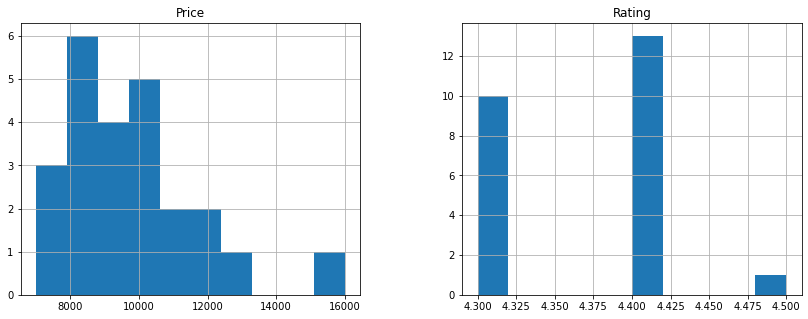

In [30]:
# Plot Histograms of Price and Rating
import seaborn as sns
import matplotlib.pyplot as plt

mobile_df.hist(figsize=(14,5))
plt.show()

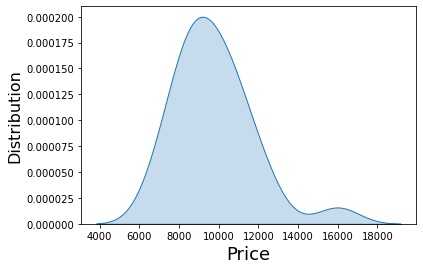

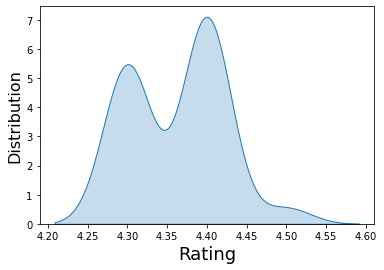

In [31]:
# Plot Distibution Plots of Price and Rating
columns=['Price','Rating']
for i in columns:
    sns.kdeplot(mobile_df[i],shade=True)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Distribution', fontsize=16)
    plt.show()

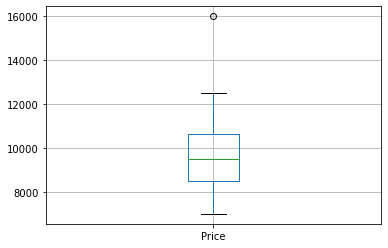

In [32]:
# Boxplot of Price  using Dataframe method
mobile_df.boxplot(column='Price',grid=True,figsize=(6,4))
plt.show()

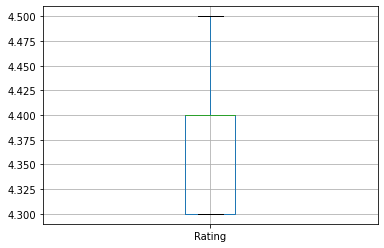

In [33]:
# Box plot of Rating

mobile_df.boxplot(column='Rating',grid=True,figsize=(6,4))
plt.show()

# Bivariate Analysis

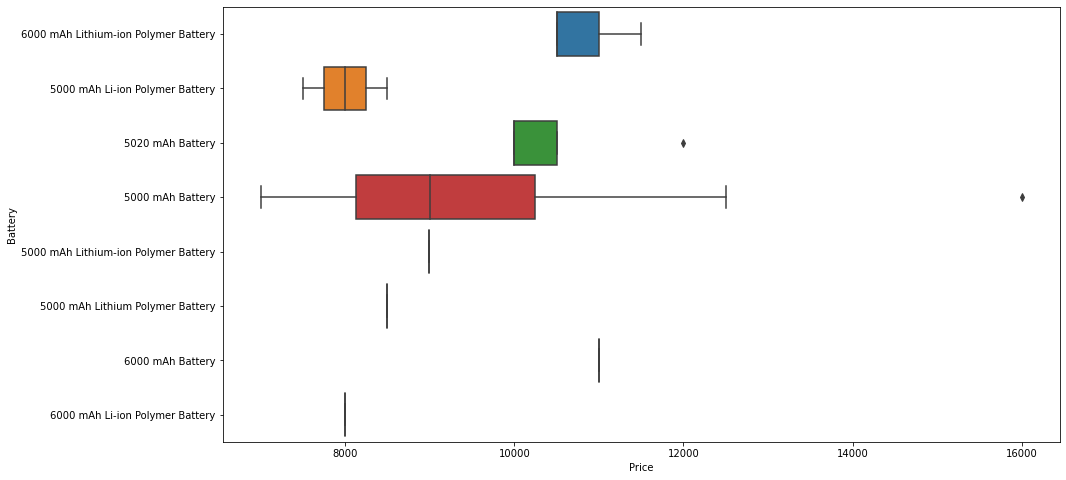

In [35]:
# Box plot of Battery and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Battery",x='Price',data=mobile_df)
plt.show()

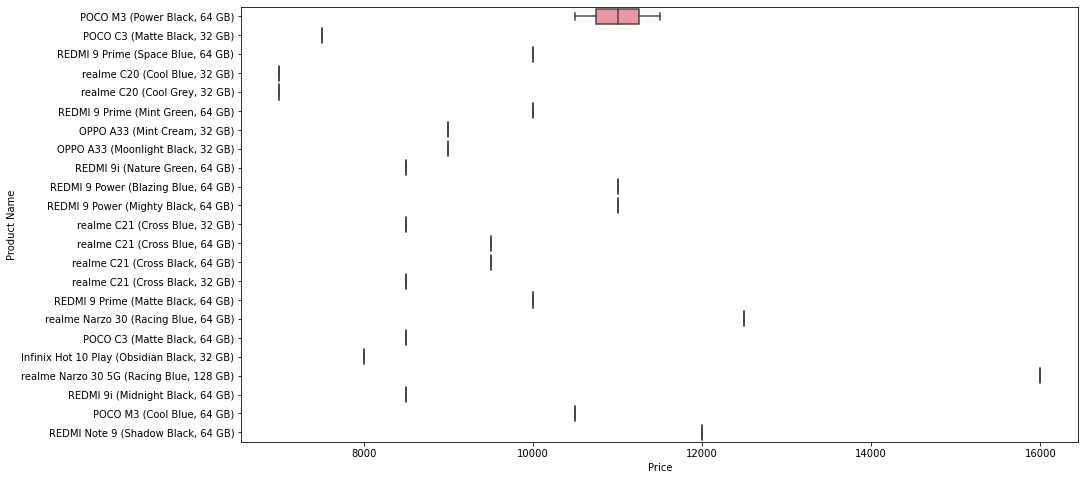

In [38]:
# Box plot of Product and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Product Name",x='Price',data=mobile_df)
plt.show()

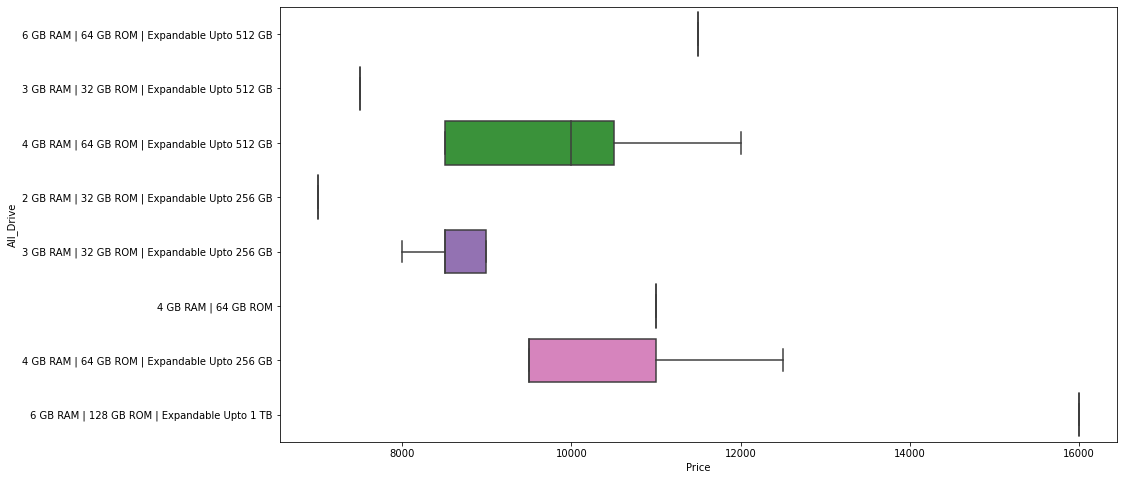

In [39]:
# Box plot of All_drive and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="All_Drive",x='Price',data=mobile_df)
plt.show()

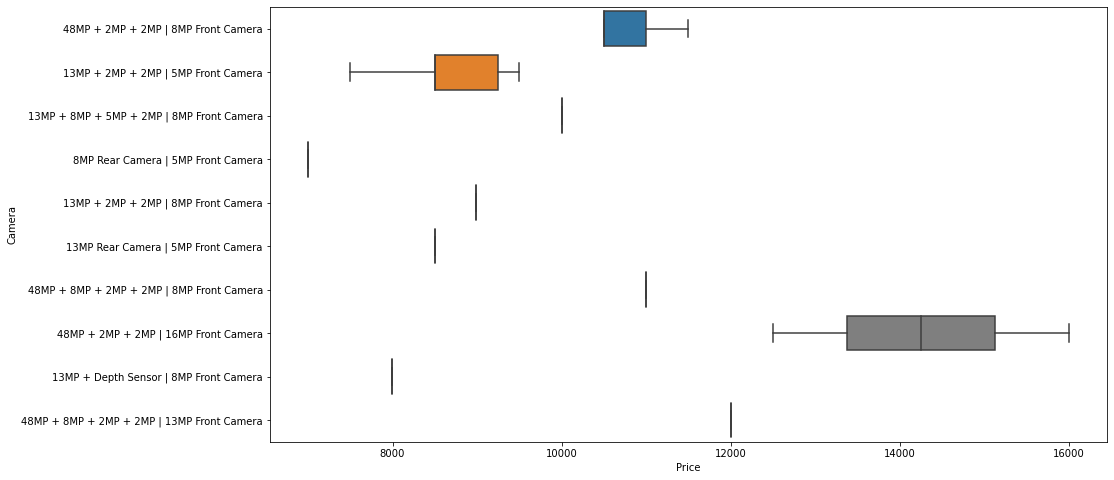

In [40]:
# Box plot of Camera and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Camera",x='Price',data=mobile_df)
plt.show()

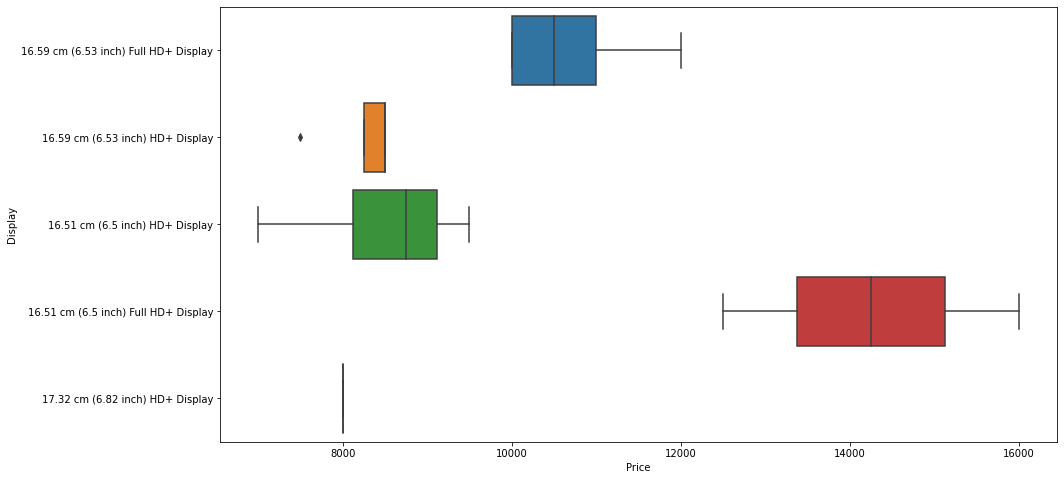

In [41]:
# Box plot of Display and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Display",x='Price',data=mobile_df)
plt.show()

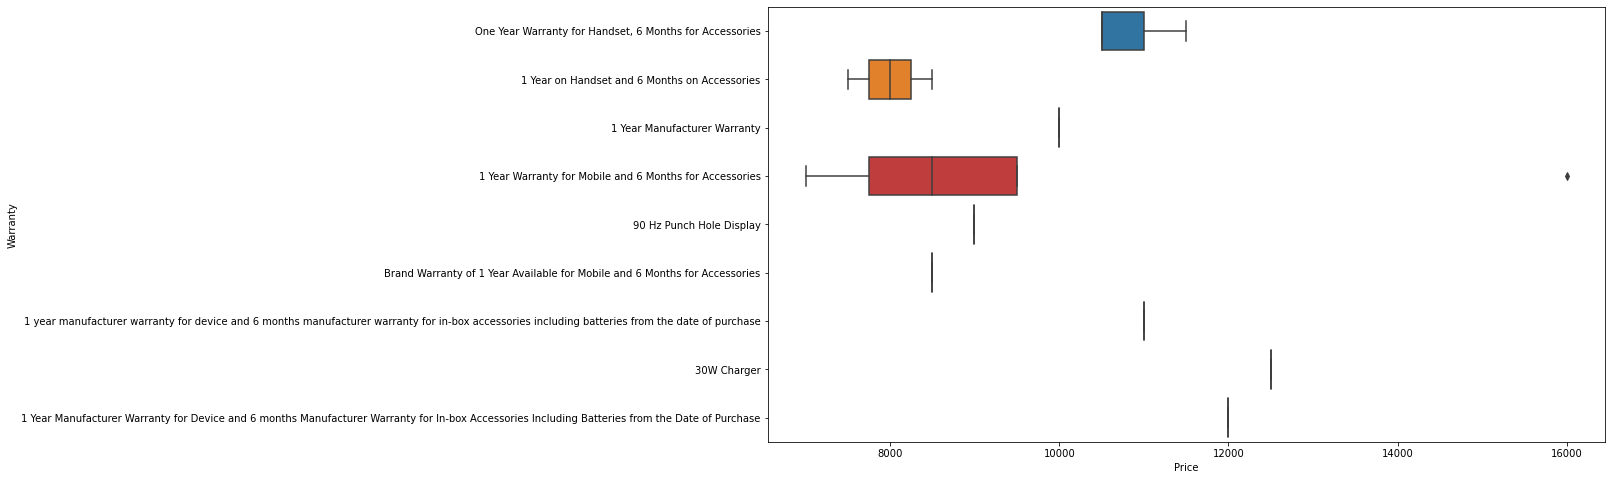

In [42]:
# Box plot of Warranty and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Warranty",x='Price',data=mobile_df)
plt.show()

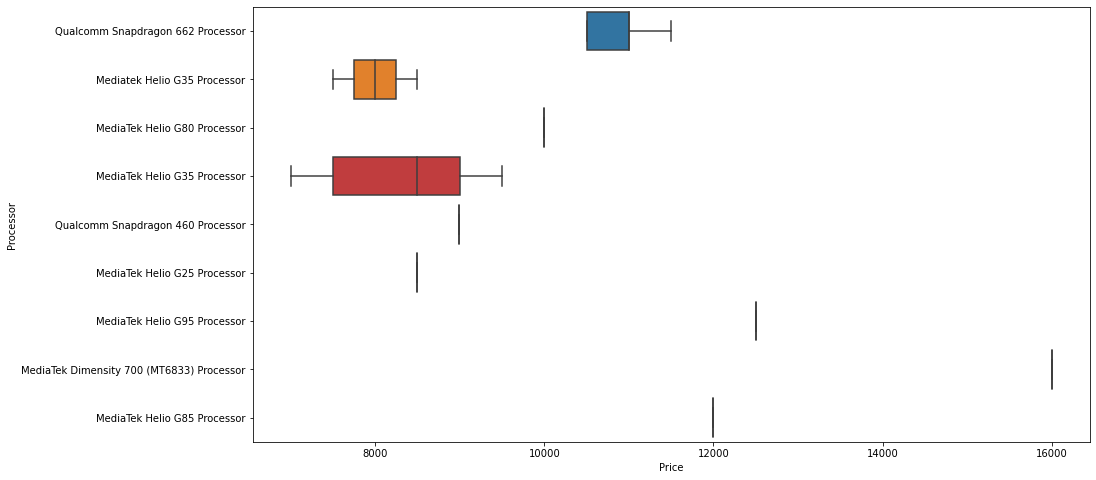

In [43]:
# Box plot of Processor and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Processor",x='Price',data=mobile_df)
plt.show()

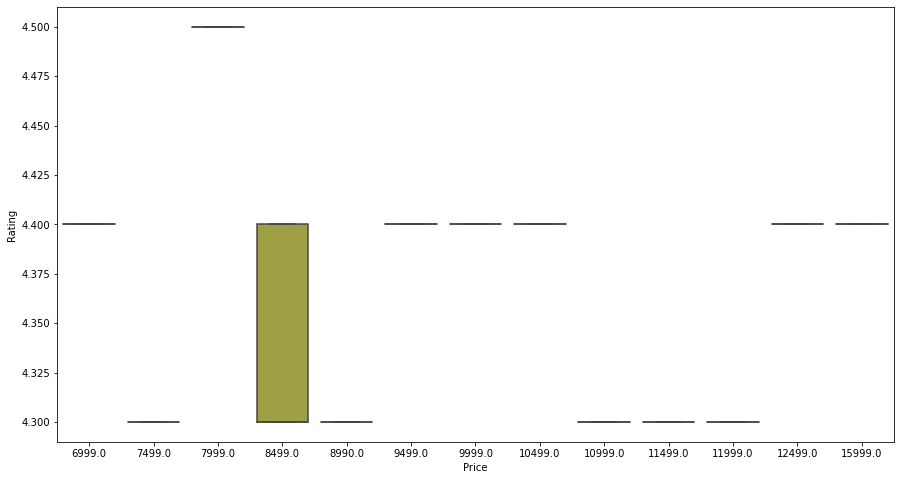

In [58]:
# Box plot of Rating and Price
plt.figure(figsize=(15,8))
sns.boxplot(y="Rating",x='Price',data=mobile_df)
plt.show()

# Bar Graphs using Matplotlib

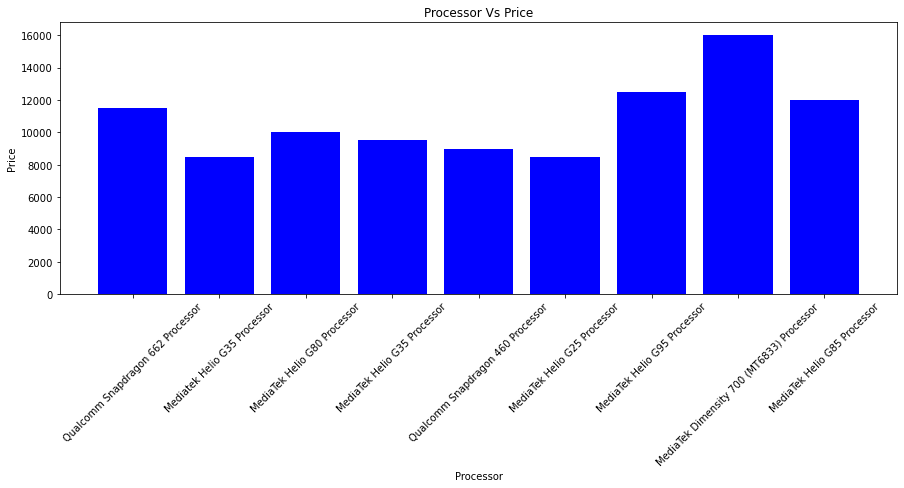

In [44]:
# Bar Graph - Processor Vs Price
# Using plt
plt.figure(figsize=(15,5))
plt.bar(mobile_df['Processor'],mobile_df['Price'],color='blue')
plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()

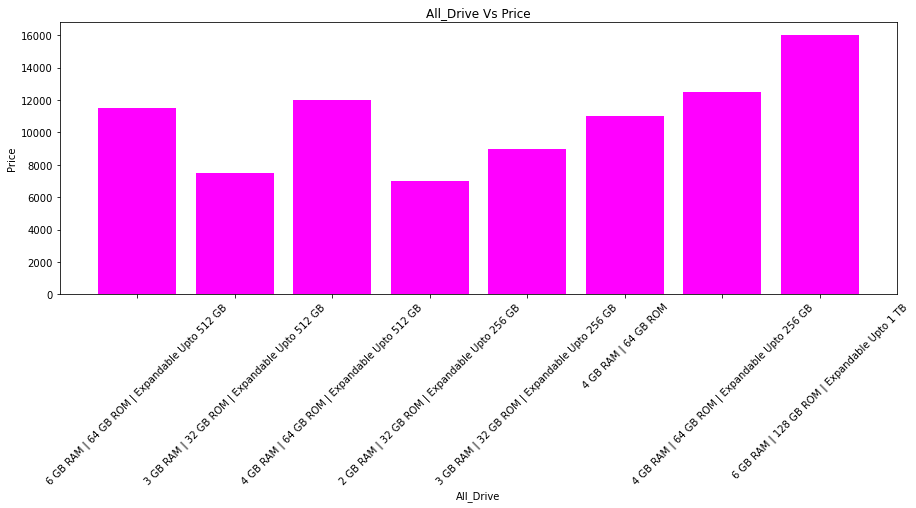

In [45]:
# Bar Graph -All_Drive Vs Price
plt.figure(figsize=(15,5))
plt.bar(mobile_df['All_Drive'],mobile_df['Price'],color='fuchsia')
plt.xticks(rotation=45)
plt.xlabel('All_Drive')
plt.ylabel('Price')
plt.title('All_Drive Vs Price')
plt.show()

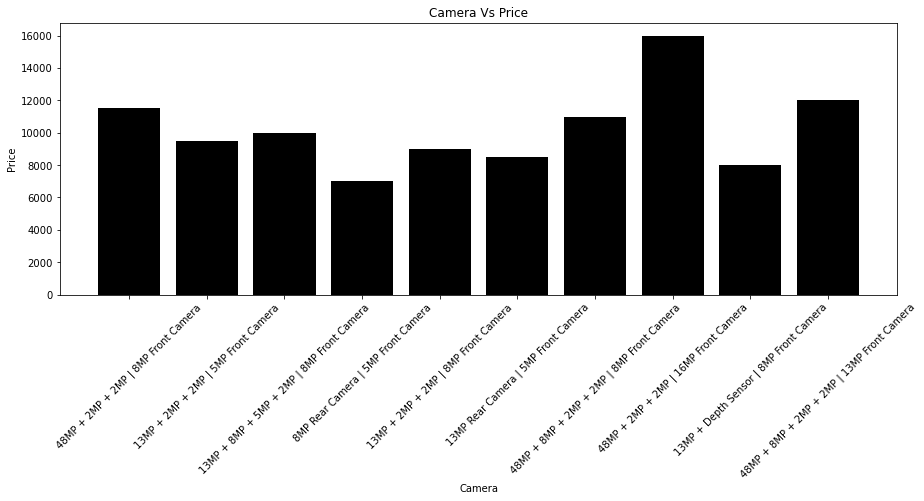

In [47]:
# Bar Graph -Camera Vs Price
plt.figure(figsize=(15,5))
plt.bar(mobile_df['Camera'],mobile_df['Price'],color='k')
plt.xticks(rotation=45)
plt.xlabel('Camera')
plt.ylabel('Price')
plt.title('Camera Vs Price')
plt.show()

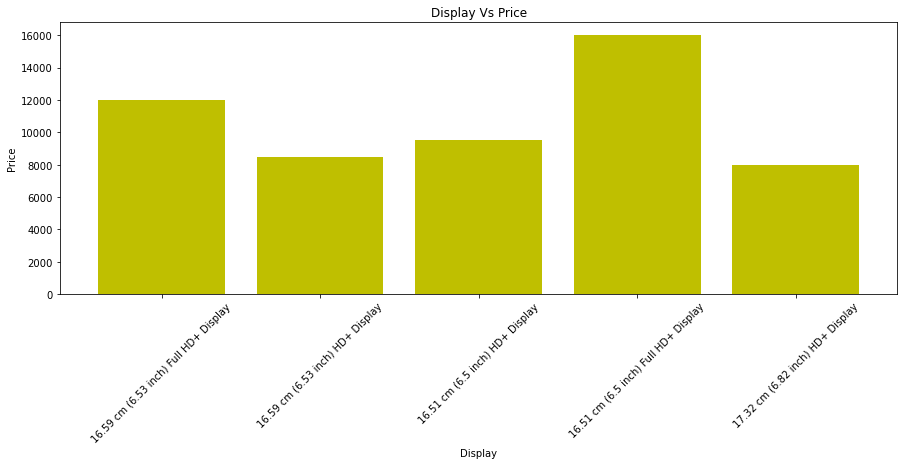

In [48]:
# Bar Graph -Display Vs Price
plt.figure(figsize=(15,5))
plt.bar(mobile_df['Display'],mobile_df['Price'],color='y')
plt.xticks(rotation=45)
plt.xlabel('Display')
plt.ylabel('Price')
plt.title('Display Vs Price')
plt.show()

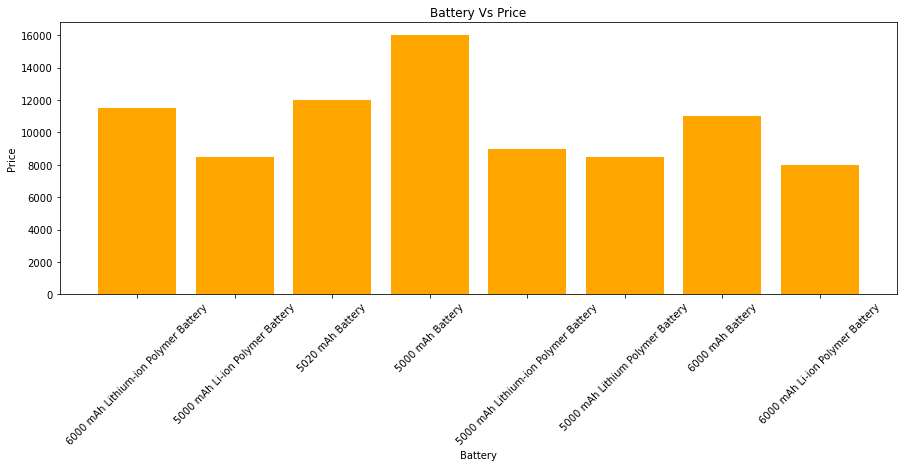

In [51]:
# Bar Graph -Battery Vs Price
plt.figure(figsize=(15,5))
plt.bar(mobile_df['Battery'],mobile_df['Price'],color='Orange')
plt.xticks(rotation=45)
plt.xlabel('Battery')
plt.ylabel('Price')
plt.title('Battery Vs Price')
plt.show()

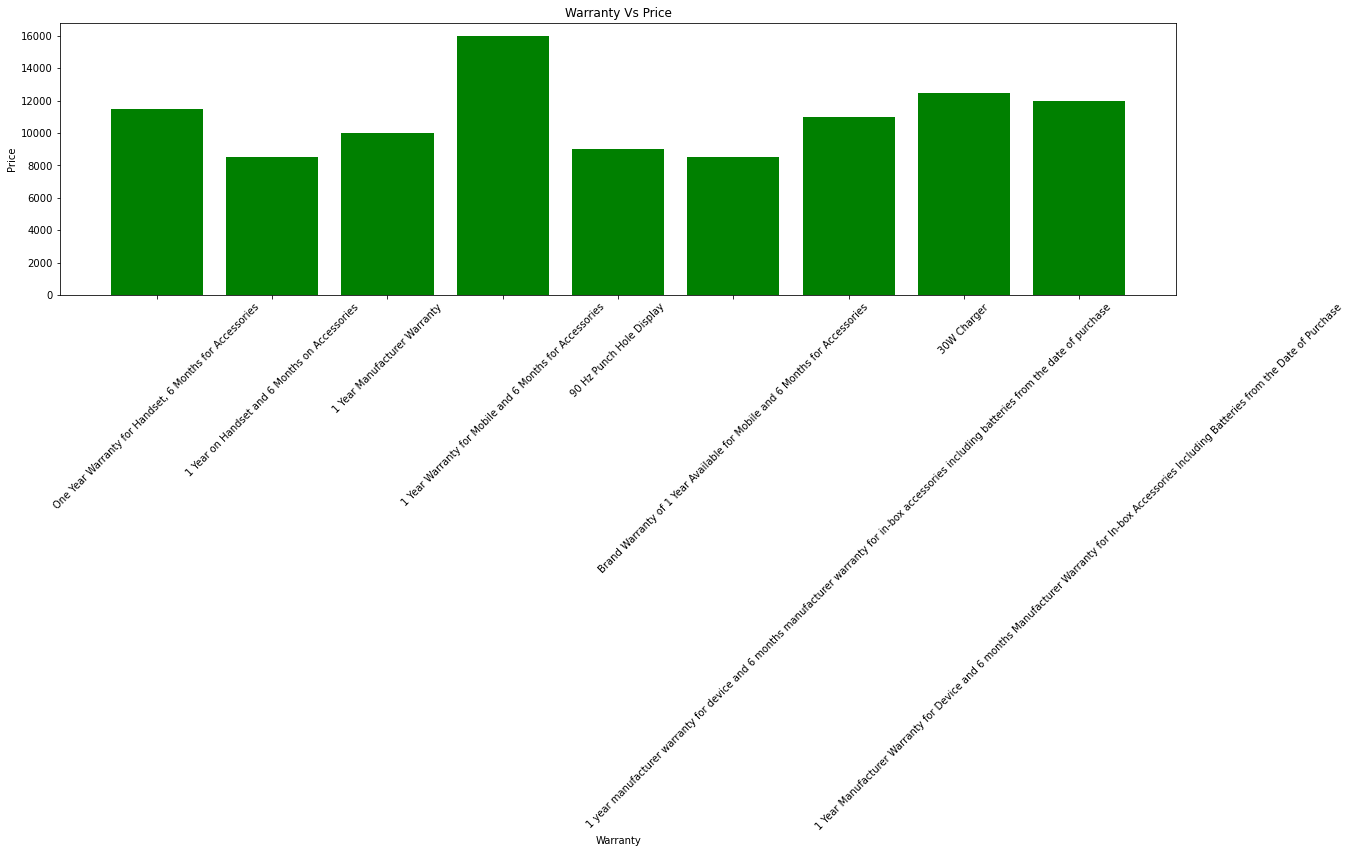

In [56]:
# Bar Graph -Warranty Vs Price
plt.figure(figsize=(20,5))
plt.bar(mobile_df['Warranty'],mobile_df['Price'],color='green')
plt.xticks(rotation=45)
plt.xlabel('Warranty')
plt.ylabel('Price')
plt.title('Warranty Vs Price')
plt.show()

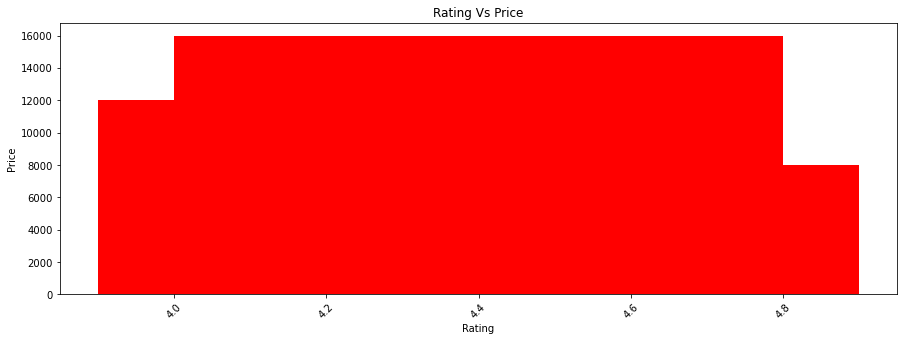

In [57]:
# Bar Graph -Rating Vs Price
plt.figure(figsize=(15,5))
plt.bar(mobile_df['Rating'],mobile_df['Price'],color='red')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating Vs Price')
plt.show()

# BarPlots using Seaborn library

#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Price', ylabel='Display'>

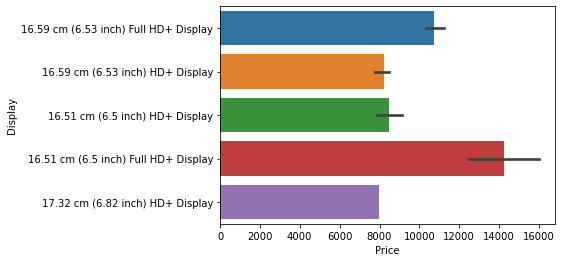

In [61]:
# Bar Plot - Price Vs Display

sns.barplot(x=mobile_df.Price, y=mobile_df.Display)

<AxesSubplot:xlabel='Price', ylabel='All_Drive'>

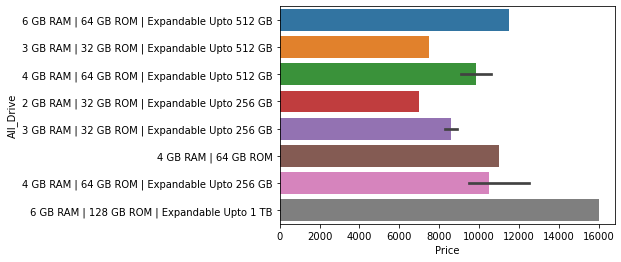

In [62]:
# Bar Plot - Price Vs All_Drive

sns.barplot(x=mobile_df.Price, y=mobile_df.All_Drive)

<AxesSubplot:xlabel='Price', ylabel='Camera'>

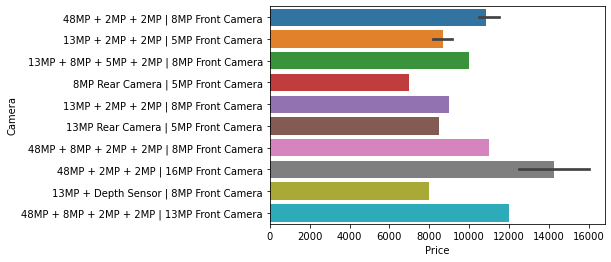

In [63]:
# Bar Plot - Price Vs Camera

sns.barplot(x=mobile_df.Price, y=mobile_df.Camera)

<AxesSubplot:xlabel='Price', ylabel='Processor'>

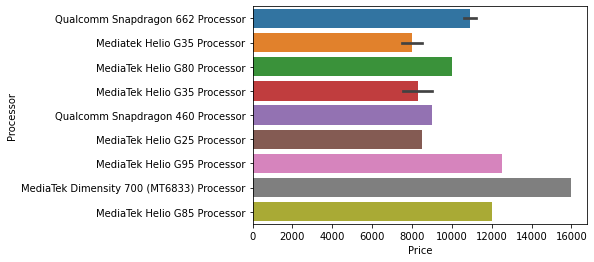

In [64]:
# Bar Plot - Price Vs Processor

sns.barplot(x=mobile_df.Price, y=mobile_df.Processor)

<AxesSubplot:xlabel='Price', ylabel='Battery'>

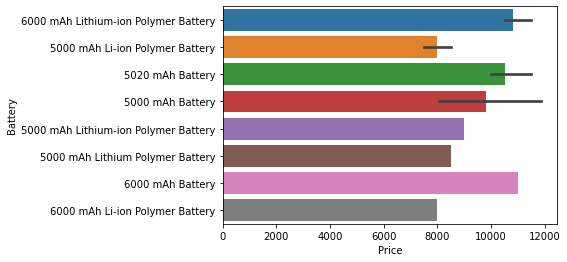

In [65]:
# Bar Plot - Price Vs Battery

sns.barplot(x=mobile_df.Price, y=mobile_df.Battery)

<AxesSubplot:xlabel='Price', ylabel='Warranty'>

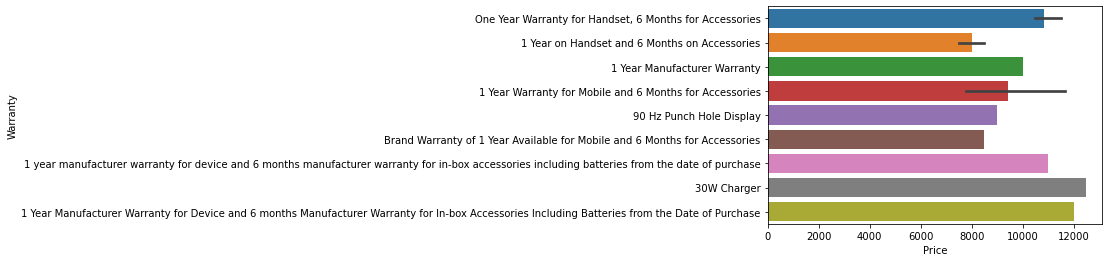

In [66]:
# Bar Plot - Price Vs Warranty

sns.barplot(x=mobile_df.Price, y=mobile_df.Warranty)

<AxesSubplot:xlabel='Price', ylabel='Product Name'>

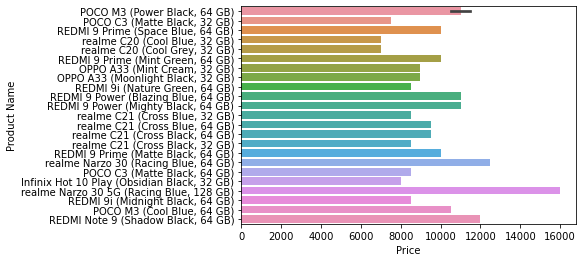

In [72]:
# Bar Plot - Price Vs Product Name

sns.barplot(x=mobile_df.Price, y=mobile_df["Product Name"])

# BarPlots using Seaborn library
Categorical Variables versus Price

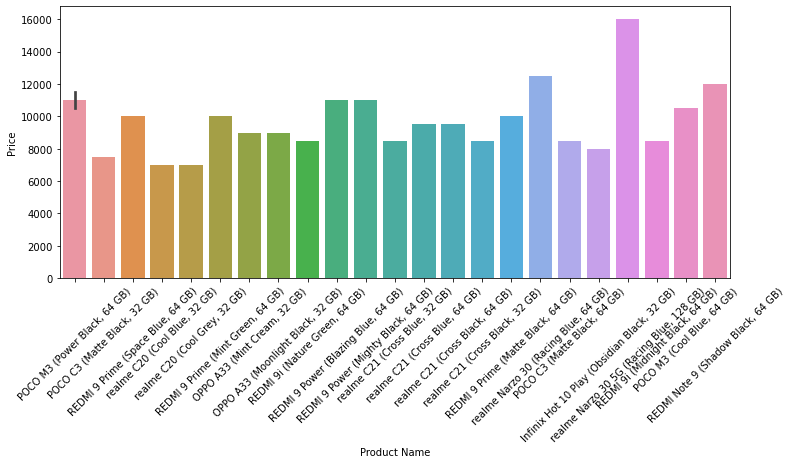

In [75]:
# Bar Plot - Product Name Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Product Name'], y=mobile_df['Price'])
plt.xticks(rotation=45);

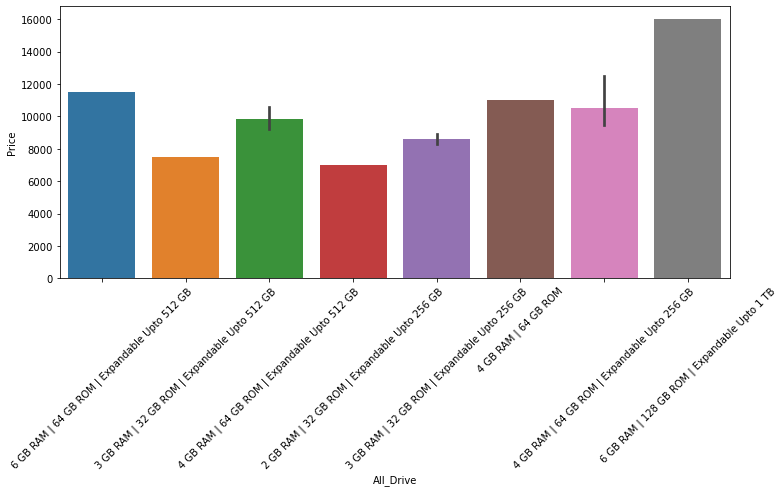

In [76]:
# Bar Plot - All_Drive Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['All_Drive'], y=mobile_df['Price'])
plt.xticks(rotation=45);

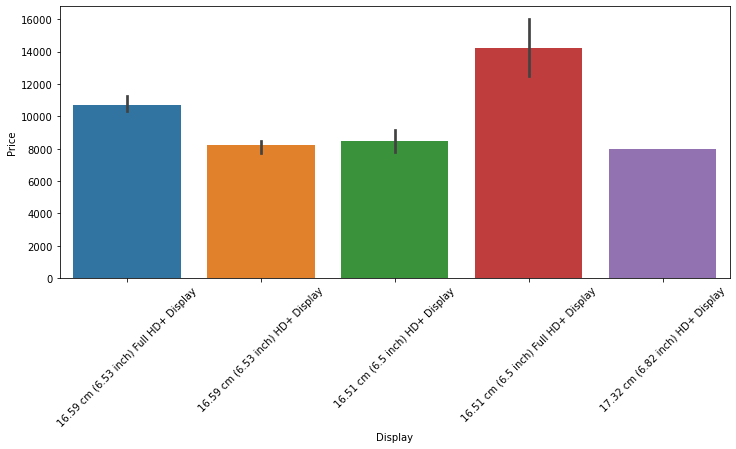

In [77]:
# Bar Plot - Display Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Display'], y=mobile_df['Price'])
plt.xticks(rotation=45);

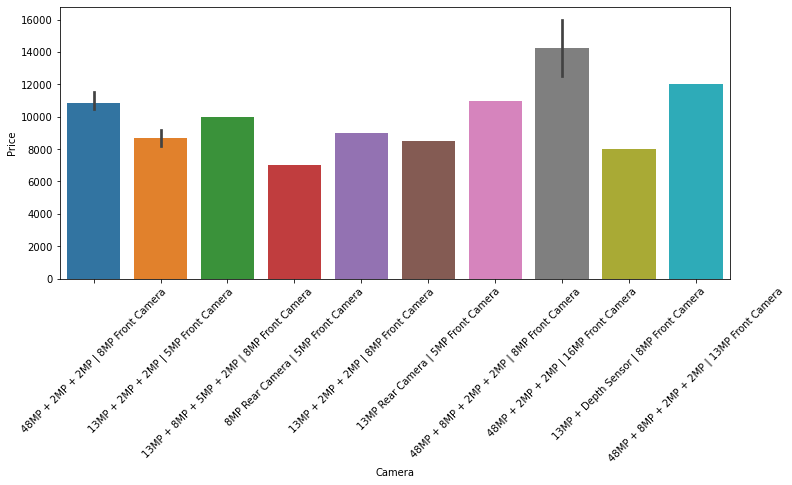

In [78]:
# Bar Plot - Camera Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Camera'], y=mobile_df['Price'])
plt.xticks(rotation=45);

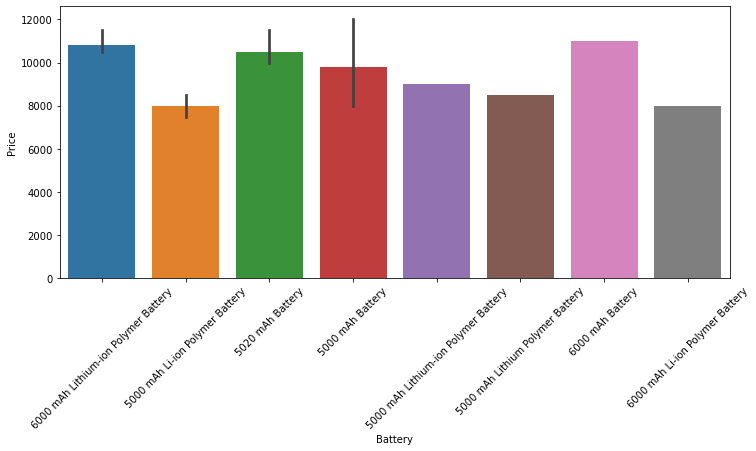

In [79]:
# Bar Plot - Battery Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Battery'], y=mobile_df['Price'])
plt.xticks(rotation=45);

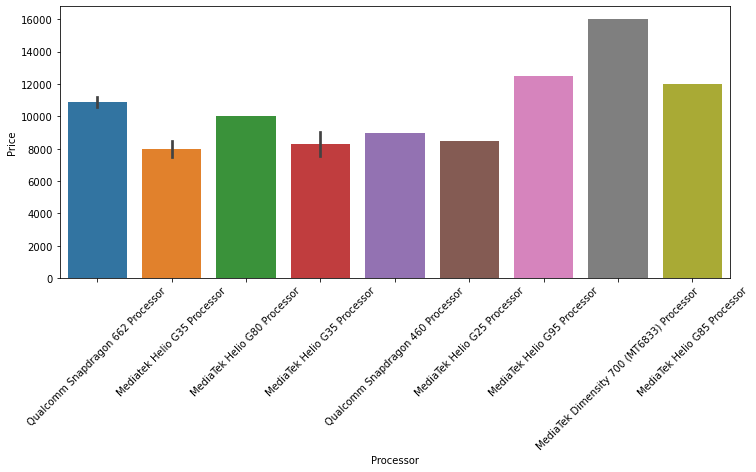

In [80]:
# Bar Plot - Processor Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Processor'], y=mobile_df['Price'])
plt.xticks(rotation=45);

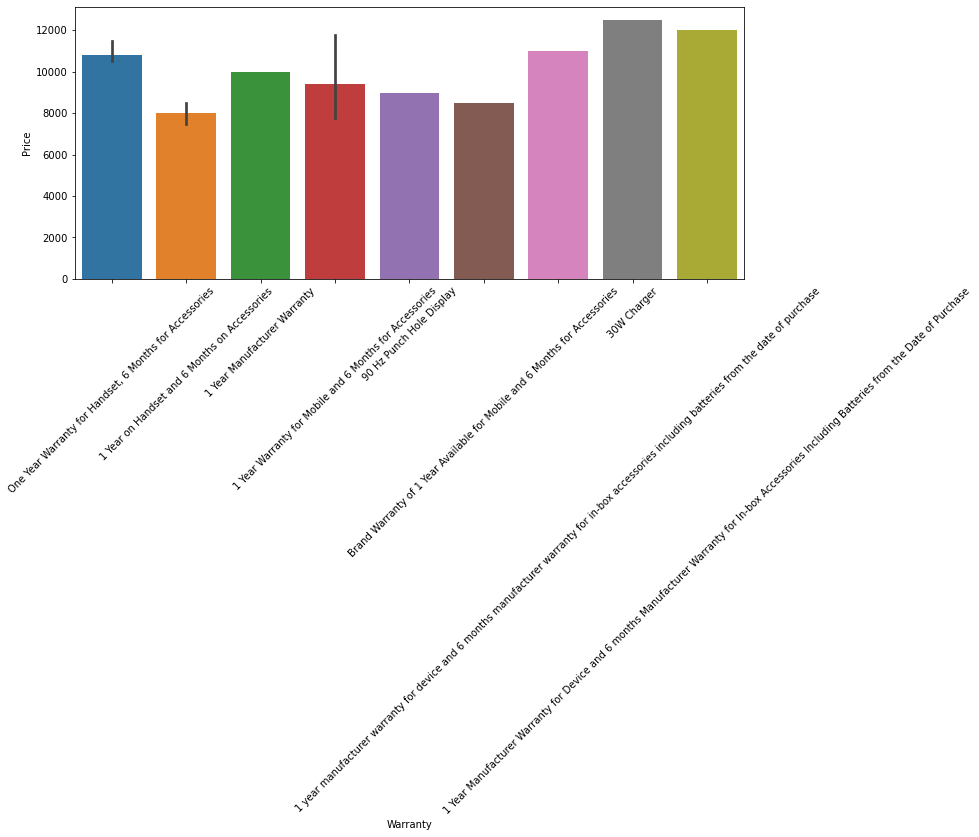

In [81]:
# Bar Plot - Warranty Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=mobile_df['Warranty'], y=mobile_df['Price'])
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Rating', ylabel='Price'>

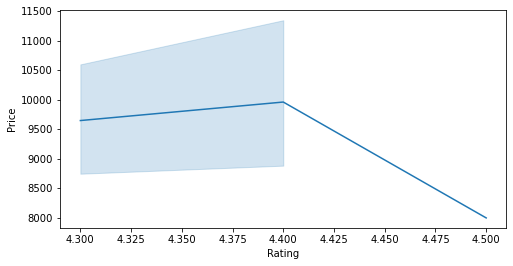

In [83]:
# Line Plot - Rating Vs Price between categorical variables
plt.figure(figsize=(8,4))
sns.lineplot(x=mobile_df['Rating'], y=mobile_df['Price'])